## Part1:K-Nearest Neighbors


#### 1.1Indicator Fucntion :



$$
I[A]=\begin{cases}
1,if \ A \ occurs \\ 0,otherwise 
\end{cases}
$$


#### 1.2 Classification Error Rate and Acc RATE
$$
Err(f,D) = \frac{1}{M}\sum^M_{i=1}I[y^(i) \neq f(x^{(i)})]
$$


$$
Acc(f,D) = \frac{1}{M}\sum^M_{i=1}I[y^(i) = f(x^{(i)})]
$$

#### 1.3KNN classification Function
$$
f_{KNN}(x) = {arg\ max}_{c\in{\{1...C\}}}\sum_{i\in N_K(x)}I[y^{(i)} = c]
$$

> 1...C is the target type. $N_k(x)$ is KNN group by seen x(with K neighbor) \\

Distance Metrics
$$
d_p(x,x') = ||x-x'||_p = (\sum^N_{j=1}|x_j-x'_j|^p)^{1/p}
$$
> Special cases include Euclidean distance(p=2), Manhattan distance(p=1) and Chebyshev distance(p=$\infty$)

Instead of giving all of the K neighbors equal weight in the majority vote,a distance-weighted majority can be used:
$$
f_{KNN} = arg\ max_{c\in \{1,...,C\}}\frac{\sum_{i\in N_k(x)}w_iI[y^{(i)}=c]}{\sum_{i\in N_k(x)}w_i}
$$
$$
where\ w_i = exp(-\alpha d_i)
$$


***KNN trade-offs***

advantages:
* No training period is involved (i.e., lazy learning), and new data 
can be added seamlessly without re-training the modl
* Converges to the correct decision surface as data goes to infinity

disadvantages:
* Does not work well with large datasets. Since KNN needs to 
store all training data, performing neighbor search requires a lo 
of memory and takes a lot of te
* Does not work well with high dimensions. It becomes difficult for 
KNN to calculate the distance in each dimension. Moreover 
everything is far from everything else in high dimensions im
e

#### 1.4 Probabilistic Classifiers
**prior:**
$$
p(y=c) = \frac{\sum^M_{i=1}I[y^{(i)}=c}{M}
$$

**Gaussian distribution:**
$$
p(x|y=c;\mu_c;\sigma^2_c) = \frac{1}{\sqrt{2\pi\sigma^2_c}}exp\{-\frac{1}{2\sigma^2_c}(x-\mu)^2 \}
$$

$$
with\ mean\ \mu \ and \ variance\  \sigma^2
$$

**Maximum likelihood estimation(MLE)**
$$
(\tilde{\mu},\tilde{\sigma^2}) = arg\ max_{\mu_c,\sigma^2_c}\sum^{M_c}_{i=1}logp(x^{(i)}|y^{(i)};\mu_c;\sigma_c^2)
$$
$$
Sample\  mean = \tilde(\mu_c) = \frac{1}{M_c}\sum^{M_c}_{i=1}x^{(i)} 
$$
$$
Sample \ variance:\tilde{\sigma^2_c }\frac{1}{M_c}\sum^{M_c}_{i=1}(x^{(i)}-\tilde{\mu_c})^2
$$

**Bayes'rule and posterior**

$$
p(y|x) = \frac{p(x|y)p(y)}{p(x)}
$$

In [11]:

#Demo1


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data[:,:2] #只取前两列
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42) #划分数据，random_state固定划分方式
#导入模型
from sklearn.neighbors import KNeighborsClassifier 
#训练模型
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#查看各项得分
print("y_pred",y_pred)
print("y_test",y_test)
print("score on train set", knn.score(X_train, y_train))
print("score on test set", knn.score(X_test, y_test))
print("accuracy score", accuracy_score(y_test, y_pred))


y_pred [0 2 2 1 0 2 1 2 2 2 1 2 1 1 0 0 0 1 0 1 1 1 1 2 1 1 0 1 0 1 1 1 0 0 0 0 2
 1]
y_test [0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]
score on train set 0.8482142857142857
score on test set 0.6842105263157895
accuracy score 0.6842105263157895


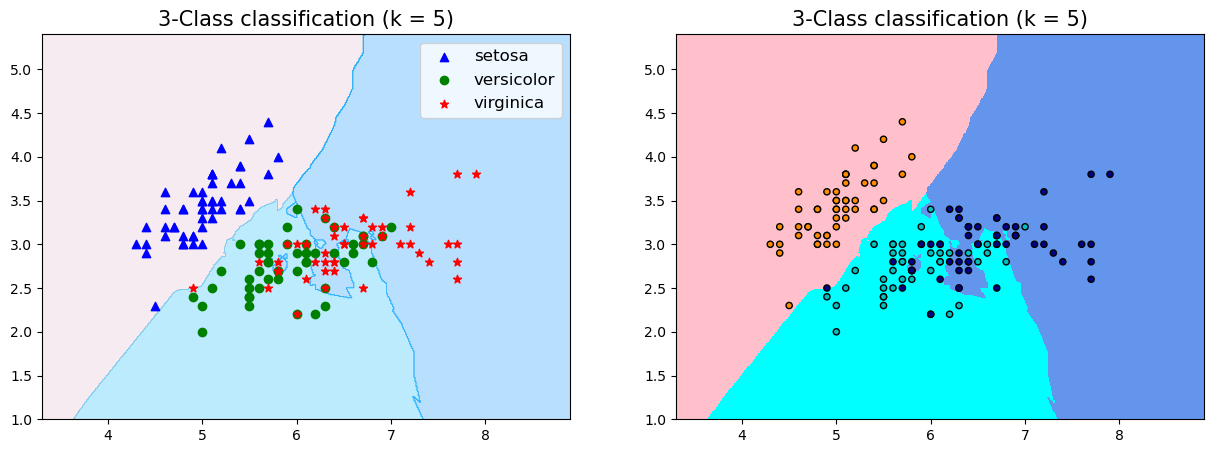

In [13]:
# 自定义colormap
def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFC0CB','#00BFFF', '#1E90FF'], 256)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
axes=[x_min, x_max, y_min, y_max]
xp=np.linspace(axes[0], axes[1], 500) #均匀500的横坐标
yp=np.linspace(axes[2], axes[3],500) #均匀500个纵坐标
xx, yy=np.meshgrid(xp, yp) #生成500X500网格点
xy=np.c_[xx.ravel(), yy.ravel()] #按行拼接，规范成坐标点的格式
y_pred = knn.predict(xy).reshape(xx.shape) #训练之后平铺

# 可视化方法一
plt.figure(figsize=(15,5),dpi=100)
plt.subplot(1,2,1)
plt.contourf(xx, yy, y_pred, alpha=0.3, cmap=colormap())
#画三种类型的点
p1=plt.scatter(X[y==0,0], X[y==0, 1], color='blue',marker='^')
p2=plt.scatter(X[y==1,0], X[y==1, 1], color='green', marker='o')
p3=plt.scatter(X[y==2,0], X[y==2, 1], color='red',marker='*')
#设置注释
plt.legend([p1, p2, p3], iris['target_names'], loc='upper right',fontsize='large')
#设置标题
plt.title(f"3-Class classification (k = {n_neighbors})", fontdict={'fontsize':15} )

# 可视化方法二
plt.subplot(1,2,2)
cmap_light = ListedColormap(['pink', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
plt.pcolormesh(xx, yy, y_pred, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = {n_neighbors})" ,fontdict={'fontsize':15})
plt.show()